In [166]:
%pip install pandas matplotlib seaborn scikit-learn -q



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [187]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('mcdonalds.csv')



In [168]:
df.head()

,_id,active,name,code,country,timezone,address,city,neighborhood,cep,...,services.mcDelivery,services.timeExtended,services.mcParty,services.playPlace,services.parking,services.wifi,services.wheelchairAccess,services.dessertCenter,services.shoppingCenter,generalHour.daysOfWeek
0,61d7fcbda283bebac83e89c9,True,SOBRADINHO - SBR,SBR,BR,America/Sao_Paulo,"QD 06 - Área Reservada 3, s/n",Brasília,Sobradinho,73070035,...,False,True,False,False,True,True,True,False,False,"[{'day': 'mon', 'timePeriods': [{'start': '08:..."
1,62ed34bb7877dc2d6381ea1c,True,Drive Saída Norte - DSN,DSN,BR,America/Sao_Paulo,SPMN EPIA DF 03 Lote 02 Loja 01 Brasília - DF,Brasília,Lago Norte,71560100,...,True,True,False,False,False,False,True,False,False,"[{'day': 'mon', 'timePeriods': [{'start': '10:..."
2,62ed31417877dcd78481e3a7,True,Shopping Iguatemi - BSI,BSI,BR,America/Sao_Paulo,"SHIN CA 4 Lote A, lojas 177/178 – Shopping Igu...",Brasília,Lago Norte,71503504,...,False,False,False,False,False,False,True,True,True,"[{'day': 'mon', 'timePeriods': [{'start': '11:..."
3,62ed30849b780128a34229f8,True,Shopping Boulevard - BSB,BSB,BR,America/Sao_Paulo,"STN Terminal Norte, S/N, Conjunto J, Loja T51 ...",Brasília,Asa Norte,70770100,...,True,False,False,False,False,False,True,False,True,"[{'day': 'mon', 'timePeriods': [{'start': '10:..."
4,62ed2de97877dc4c1281d5ed,True,Asa Norte Eixinho - ASN,ASN,BR,America/Sao_Paulo,EQN 208/209 Bloco A – Lj. 50 – Asa Norte Bras...,Brasília,Asa Norte,70853400,...,True,True,False,False,False,False,True,False,False,"[{'day': 'mon', 'timePeriods': [{'start': '10:..."


In [169]:
df.describe()

,distance,coordinates.longitude,coordinates.latitude,coordinates.lng,coordinates.lat
count,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000
mean,1380.530839,-42.518490,-23.901153,-42.518490,-23.901153
std,1147.258006,9.610560,9.958499,9.610560,9.958499
min,34.005271,-63.876013,-56.114344,-63.876013,-56.114344
25%,898.639183,-47.068181,-23.694802,-47.068181,-23.694802
50%,920.855204,-46.546769,-23.480102,-46.546769,-23.480102
75%,1346.766388,-42.568615,-21.225657,-42.568615,-21.225657
max,11125.013013,46.701319,23.704880,46.701319,23.704880


In [170]:
df.shape

(2343, 39)

In [171]:
rename_dict = {
    'id': 'Identificador',
    'active': 'Ativo',
    'name': 'Nome_do_lugar',
    'code': 'Codigo',
    'country': 'Pais',
    'timezone': 'Fuso_horario',
    'address': 'Endereco',
    'city': 'Cidade',
    'neighborhood': 'Bairro',
    'services.mcDelivery': 'Delivery',
    'services.timeExtended': 'Servicos_com_tempo_extimado',
    'services.mcParty': 'Mcfestas_de_servicos',
    'services.playPlace': 'Lugar_de_brincar',
    'services.parking': 'Serviços_de_estacionamento',
    'services.wifi': 'Wifi',
    'services.wheelchairAccesse': 'Acessibilidade',
    'services.dessertCenter': 'Centro_de_sobremesas',
    'services.shoppingCenter': 'Shopping_center',
    'generalHour.daysOfWeek': 'horas_dias_da_semana',
}

df = df.rename(columns=rename_dict)


In [172]:
df.head()

,_id,Ativo,Nome_do_lugar,Codigo,Pais,Fuso_horario,Endereco,Cidade,Bairro,cep,...,Delivery,Servicos_com_tempo_extimado,Mcfestas_de_servicos,Lugar_de_brincar,Serviços_de_estacionamento,Wifi,services.wheelchairAccess,Centro_de_sobremesas,Shopping_center,horas_dias_da_semana
0,61d7fcbda283bebac83e89c9,True,SOBRADINHO - SBR,SBR,BR,America/Sao_Paulo,"QD 06 - Área Reservada 3, s/n",Brasília,Sobradinho,73070035,...,False,True,False,False,True,True,True,False,False,"[{'day': 'mon', 'timePeriods': [{'start': '08:..."
1,62ed34bb7877dc2d6381ea1c,True,Drive Saída Norte - DSN,DSN,BR,America/Sao_Paulo,SPMN EPIA DF 03 Lote 02 Loja 01 Brasília - DF,Brasília,Lago Norte,71560100,...,True,True,False,False,False,False,True,False,False,"[{'day': 'mon', 'timePeriods': [{'start': '10:..."
2,62ed31417877dcd78481e3a7,True,Shopping Iguatemi - BSI,BSI,BR,America/Sao_Paulo,"SHIN CA 4 Lote A, lojas 177/178 – Shopping Igu...",Brasília,Lago Norte,71503504,...,False,False,False,False,False,False,True,True,True,"[{'day': 'mon', 'timePeriods': [{'start': '11:..."
3,62ed30849b780128a34229f8,True,Shopping Boulevard - BSB,BSB,BR,America/Sao_Paulo,"STN Terminal Norte, S/N, Conjunto J, Loja T51 ...",Brasília,Asa Norte,70770100,...,True,False,False,False,False,False,True,False,True,"[{'day': 'mon', 'timePeriods': [{'start': '10:..."
4,62ed2de97877dc4c1281d5ed,True,Asa Norte Eixinho - ASN,ASN,BR,America/Sao_Paulo,EQN 208/209 Bloco A – Lj. 50 – Asa Norte Bras...,Brasília,Asa Norte,70853400,...,True,True,False,False,False,False,True,False,False,"[{'day': 'mon', 'timePeriods': [{'start': '10:..."


In [173]:
df['services.breakfast'] = df['services.breakfast'].fillna(0)
df['Wifi'] = df['Wifi'].fillna(0)
df['services.wheelchairAccess'] = df['services.wheelchairAccess'].fillna(0)
df = df.dropna(subset=['Bairro'])
print("\nValores nulos após o tratamento:")
print(df[['Cidade', 'Bairro', 'services.breakfast', 'Wifi', 'services.wheelchairAccess']].isnull().sum())



Valores nulos após o tratamento:
Cidade                       0
Bairro                       0
services.breakfast           0
Wifi                         0
services.wheelchairAccess    0
dtype: int64


In [174]:
print("Valores nulos antes do tratamento:")
print(df[['Cidade', 'Bairro', 'services.breakfast', 'Wifi', 'services.wheelchairAccess']].isnull().sum())
df['services.breakfast'] = df['services.breakfast'].fillna(0)
df['Wifi'] = df['Wifi'].fillna(0)
df['services.wheelchairAccess'] = df['services.wheelchairAccess'].fillna(0)
df = df.dropna(subset=['Bairro'])
print("\nValores nulos após o tratamento:")
print(df[['Cidade', 'Bairro', 'services.breakfast', 'Wifi', 'services.wheelchairAccess']].isnull().sum())




Valores nulos antes do tratamento:
Cidade                       0
Bairro                       0
services.breakfast           0
Wifi                         0
services.wheelchairAccess    0
dtype: int64

Valores nulos após o tratamento:
Cidade                       0
Bairro                       0
services.breakfast           0
Wifi                         0
services.wheelchairAccess    0
dtype: int64


In [175]:
features = ['Cidade', 'Bairro', 'Wifi', 'services.wheelchairAccess', 'Delivery', 'Servicos_com_tempo_extimado']
target = 'services.breakfast'



In [176]:
le_cidade = LabelEncoder()
le_bairro = LabelEncoder()
df['Cidade'] = le_cidade.fit_transform(df['Cidade'])
df['Bairro'] = le_bairro.fit_transform(df['Bairro'])


In [177]:
from sklearn.impute import SimpleImputer

# Select features from df
X = df[features]

# Impute missing values in X before SMOTE
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

smote = SMOTE(random_state=42)
y = df[target].map({True: 1, False: 0})  # Ensure y is numeric
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [179]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [180]:
param_grid = {
    'n_estimators': [200, 250, 300],
    'max_depth': [10, 12, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'class_weight': ['balanced', None]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor score:", grid_search.best_score_)



Melhores parâmetros: {'class_weight': None, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Melhor score: 0.8942720484293625


In [181]:
rf = grid_search.best_estimator_
y_pred = rf.predict(X_test)
print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))
print("Acurácia:", accuracy_score(y_test, y_pred))

Matriz de confusão:
[[184  32]
 [ 28 182]]
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       216
           1       0.85      0.87      0.86       210

    accuracy                           0.86       426
   macro avg       0.86      0.86      0.86       426
weighted avg       0.86      0.86      0.86       426

Acurácia: 0.8591549295774648


In [184]:
print("Matriz de confusão do Random Forest:")
print(confusion_matrix(y_test, y_pred))
print("Relatório de classificação do Random Forest:")
print(classification_report(y_test, y_pred))


Matriz de confusão do Random Forest:
[[184  32]
 [ 28 182]]
Relatório de classificação do Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       216
           1       0.85      0.87      0.86       210

    accuracy                           0.86       426
   macro avg       0.86      0.86      0.86       426
weighted avg       0.86      0.86      0.86       426



Matriz de confusão:
[[184  32]
 [ 28 182]]
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       216
           1       0.85      0.87      0.86       210

    accuracy                           0.86       426
   macro avg       0.86      0.86      0.86       426
weighted avg       0.86      0.86      0.86       426

Acurácia: 0.8591549295774648


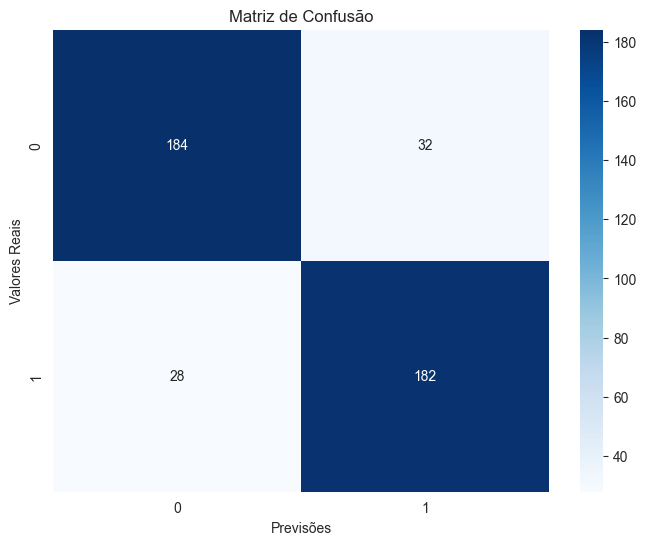

In [188]:
rf = grid_search.best_estimator_
y_pred = rf.predict(X_test)

print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))
print("Acurácia:", accuracy_score(y_test, y_pred))

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Previsões")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confusão")
plt.show()


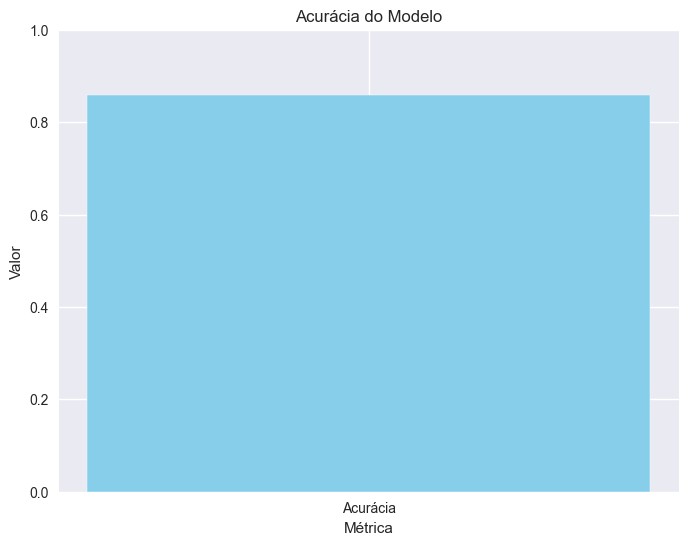

In [193]:
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-v0_8')  # Use a valid seaborn style
plt.bar(["Acurácia"], [accuracy_score(y_test, y_pred)], color="skyblue")
plt.ylim([0, 1])
plt.title("Acurácia do Modelo")
plt.xlabel("Métrica")
plt.ylabel("Valor")
plt.show()




